In [30]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data_loading.load_data import DataLoader
from src.data_loading.feature_engineering import FeatureEngineering
from src.data_loading.standardization import standardize_data

In [31]:
file_path = '../data/raw/data.xlsx'  # Specify your file path here
data_loader = DataLoader(file_path)
df = data_loader.load_data()


Data loaded from ../data/raw/data.xlsx


In [32]:
feature_engineer = FeatureEngineering(df)


In [33]:
# Step 1: Feature Engineering (add age, kwh_per_apartment, etc.)
df = feature_engineer.add_age()
df = feature_engineer.add_kwh_per_features()


Age feature added
Dropped 'Building's construction year' column
kwh_per_apartment, kwh_per_floor, and apartments_per_floor features added


In [34]:

# Step 2: Handle skewness (log transformation for skewed features)
df = feature_engineer.handle_skewness()



Dropped 'Unnamed: 0' column.
Log transformation applied to 'Total electricity consumption (kWh)'.
Log transformation applied to 'Number of apartments'.
Log transformation applied to 'Number of floors'.
Power transformation (Yeo-Johnson) applied to 'log_kwh', 'log_apartments', and 'log_floors'.
Dropped original columns after applying log transformation.


In [35]:
# Check skewness after handling
skewness = data_loader.check_skewness()


Skewness for each numerical feature:
 Longitude               -1.224980
Latitude                -0.635503
age                      8.790279
kwh_per_apartment       14.690596
kwh_per_floor           13.769709
apartments_per_floor     4.366705
log_kwh                 -0.018480
log_apartments          -0.017368
log_floors              -0.023150
dtype: float64


We notice that the columns we added are skewed so we must handle them as well:
- age                      8.790279
- kwh_per_apartment       14.690596
- kwh_per_floor           13.769709
- apartments_per_floor     4.366705

In [36]:
import numpy as np 
# Apply log transformation for 'kwh_per_apartment', 'kwh_per_floor', and 'apartments_per_floor'
df['log_kwh_per_apartment'] = np.log(df['kwh_per_apartment'] + 1)
df['log_kwh_per_floor'] = np.log(df['kwh_per_floor'] + 1)
df['log_apartments_per_floor'] = np.log(df['apartments_per_floor'] + 1)
print("Log transformation applied to 'kwh_per_apartment', 'kwh_per_floor', and 'apartments_per_floor'.")

Log transformation applied to 'kwh_per_apartment', 'kwh_per_floor', and 'apartments_per_floor'.


In [37]:
 # Apply log transformation to 'age' to reduce skewness
df['log_age'] = np.log(df['age'] + 1)  # Adding 1 to avoid log(0)
print("Log transformation applied to 'age'.")

Log transformation applied to 'age'.


In [38]:
df.drop(columns=['kwh_per_apartment', 'kwh_per_floor', 'apartments_per_floor', 'age'], inplace=True)
print("Dropped original columns after applying log transformation.")

Dropped original columns after applying log transformation.


In [39]:
# Check skewness after handling
skewness = data_loader.check_skewness()


Skewness for each numerical feature:
 Longitude                  -1.224980
Latitude                   -0.635503
log_kwh                    -0.018480
log_apartments             -0.017368
log_floors                 -0.023150
log_kwh_per_apartment       1.624804
log_kwh_per_floor           1.143072
log_apartments_per_floor    1.440247
log_age                    -1.795353
dtype: float64


In [40]:
df.head()


,Longitude,Latitude,log_kwh,log_apartments,log_floors,log_kwh_per_apartment,log_kwh_per_floor,log_apartments_per_floor,log_age
0,35.533624,33.894686,-2.011070,0.558041,0.114532,0.269072,0.480882,1.098612,4.356709
1,35.534409,33.894500,-0.908721,-1.103820,-0.931215,1.701744,1.701744,0.693147,4.584967
2,35.534231,33.894505,-2.646001,-1.870766,-1.846443,0.708036,0.708036,0.693147,4.584967
3,35.534065,33.894415,-0.164134,0.217549,0.114532,1.507331,1.836095,0.916291,4.219508
4,35.532584,33.894118,-0.100064,0.816927,0.464925,1.185524,1.712861,1.098612,4.356709


In [41]:
df.describe()

,Longitude,Latitude,log_kwh,log_apartments,log_floors,log_kwh_per_apartment,log_kwh_per_floor,log_apartments_per_floor,log_age
count,1761.000000,1761.000000,1.761000e+03,1.761000e+03,1.761000e+03,1761.000000,1761.000000,1761.000000,1761.000000
mean,35.516357,33.890811,1.210465e-16,-1.613953e-17,-4.196277e-16,1.884106,2.155122,0.895037,4.148778
std,0.017818,0.005901,1.000284e+00,1.000284e+00,1.000284e+00,0.812903,0.837342,0.291236,0.455172
min,35.470755,33.871391,-2.652791e+00,-1.870766e+00,-1.846443e+00,0.024074,0.093002,0.133531,1.609438
25%,35.510798,33.887985,-7.340460e-01,-6.196853e-01,-9.312149e-01,1.417132,1.627081,0.693147,4.025352
50%,35.524235,33.891154,1.331007e-02,-1.300927e-03,1.145319e-01,1.796249,2.116677,0.693147,4.219508
75%,35.529168,33.895281,7.441065e-01,8.169266e-01,7.531916e-01,2.204779,2.575159,1.098612,4.477337
max,35.535264,33.902642,2.826684e+00,3.552369e+00,3.145248e+00,6.896694,6.896694,2.740840,6.683361


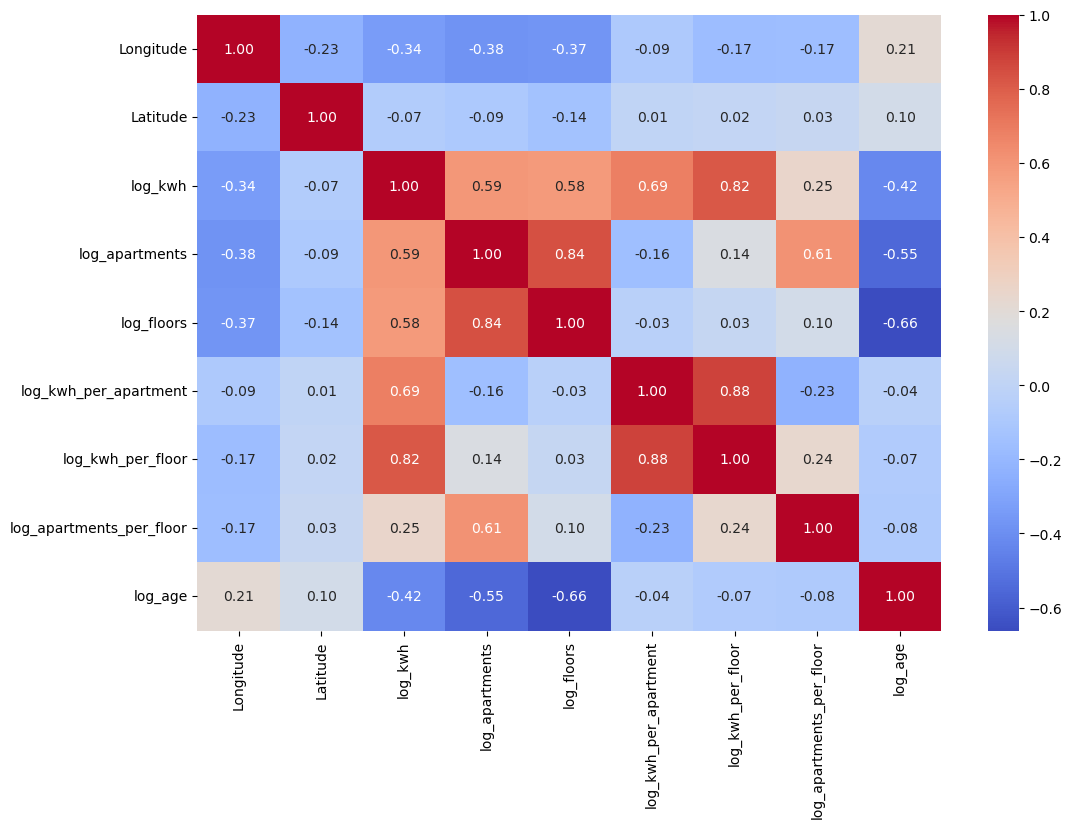

In [42]:
#Feature Correlation
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [43]:
import pandas as pd

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set the correlation threshold for feature selection (e.g., 0.9)
threshold = 0.8

# Find highly correlated features
high_corr_var = np.where(corr_matrix > threshold)
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) 
                 for x, y in zip(*high_corr_var) 
                 if x != y and x < y]  # To avoid duplicating pairs (i.e., (A, B) and (B, A))

# Print high correlation pairs
print(f"Highly correlated pairs (correlation > {threshold}):\n", high_corr_var)


Highly correlated pairs (correlation > 0.8):
 [('log_kwh', 'log_kwh_per_floor'), ('log_apartments', 'log_floors'), ('log_kwh_per_apartment', 'log_kwh_per_floor')]


In [44]:
# Create a list to store features to drop
features_to_drop = []

# Iterate through the high correlation pairs
for var1, var2 in high_corr_var:
    # Drop one feature from each pair (you can choose based on intuition or model performance)
    features_to_drop.append(var2)  # In this case, we'll drop the second variable in the pair

# Drop redundant features
df.drop(columns=features_to_drop, inplace=True)

print(f"Dropped features: {features_to_drop}")


Dropped features: ['log_kwh_per_floor', 'log_floors', 'log_kwh_per_floor']


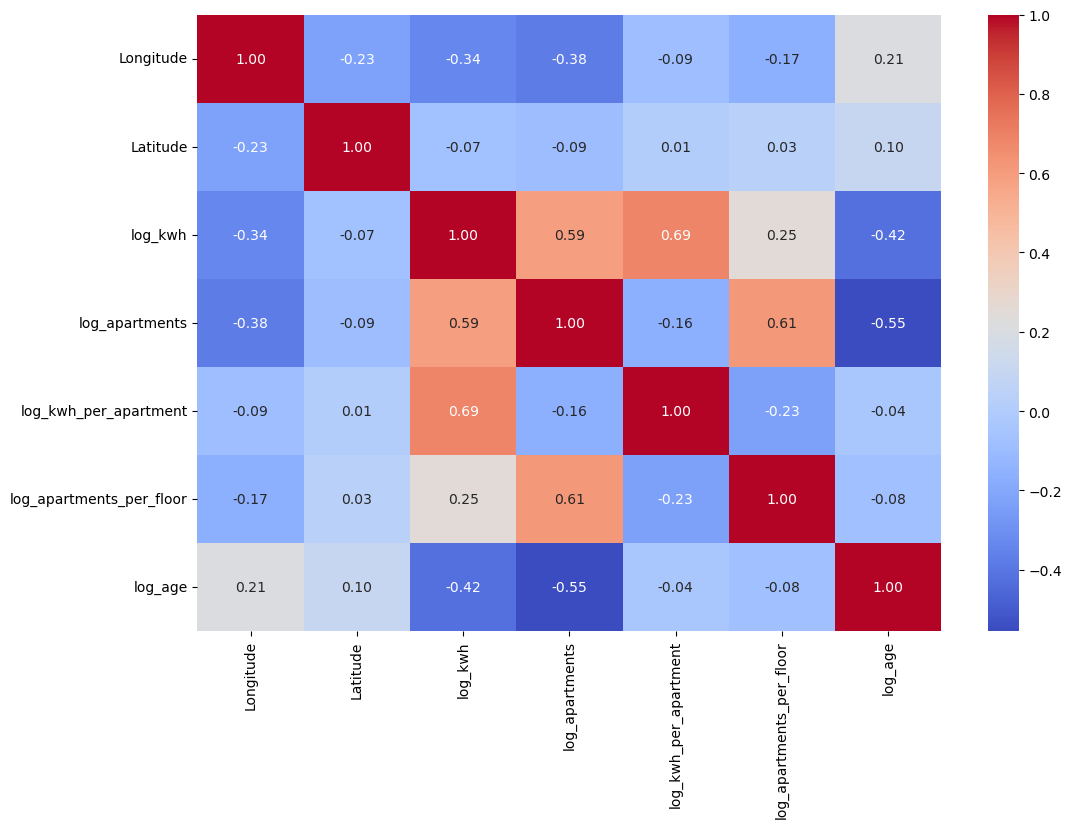

In [45]:
# Recalculate the correlation matrix after dropping the feature
new_corr_matrix = df.corr()

# Visualize the updated correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(new_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [46]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Longitude                 1761 non-null   float64
 1   Latitude                  1761 non-null   float64
 2   log_kwh                   1761 non-null   float64
 3   log_apartments            1761 non-null   float64
 4   log_kwh_per_apartment     1761 non-null   float64
 5   log_apartments_per_floor  1761 non-null   float64
 6   log_age                   1761 non-null   float64
dtypes: float64(7)
memory usage: 96.4 KB
None
         Longitude     Latitude       log_kwh  log_apartments  \
count  1761.000000  1761.000000  1.761000e+03    1.761000e+03   
mean     35.516357    33.890811  1.210465e-16   -1.613953e-17   
std       0.017818     0.005901  1.000284e+00    1.000284e+00   
min      35.470755    33.871391 -2.652791e+00   -1.870766e+00   
25%      35.510798    33.887

In [47]:
df.drop(columns="log_apartments_per_floor", inplace=True)


In [48]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Longitude              1761 non-null   float64
 1   Latitude               1761 non-null   float64
 2   log_kwh                1761 non-null   float64
 3   log_apartments         1761 non-null   float64
 4   log_kwh_per_apartment  1761 non-null   float64
 5   log_age                1761 non-null   float64
dtypes: float64(6)
memory usage: 82.7 KB
None
         Longitude     Latitude       log_kwh  log_apartments  \
count  1761.000000  1761.000000  1.761000e+03    1.761000e+03   
mean     35.516357    33.890811  1.210465e-16   -1.613953e-17   
std       0.017818     0.005901  1.000284e+00    1.000284e+00   
min      35.470755    33.871391 -2.652791e+00   -1.870766e+00   
25%      35.510798    33.887985 -7.340460e-01   -6.196853e-01   
50%      35.524235    33.891154  1.331007e

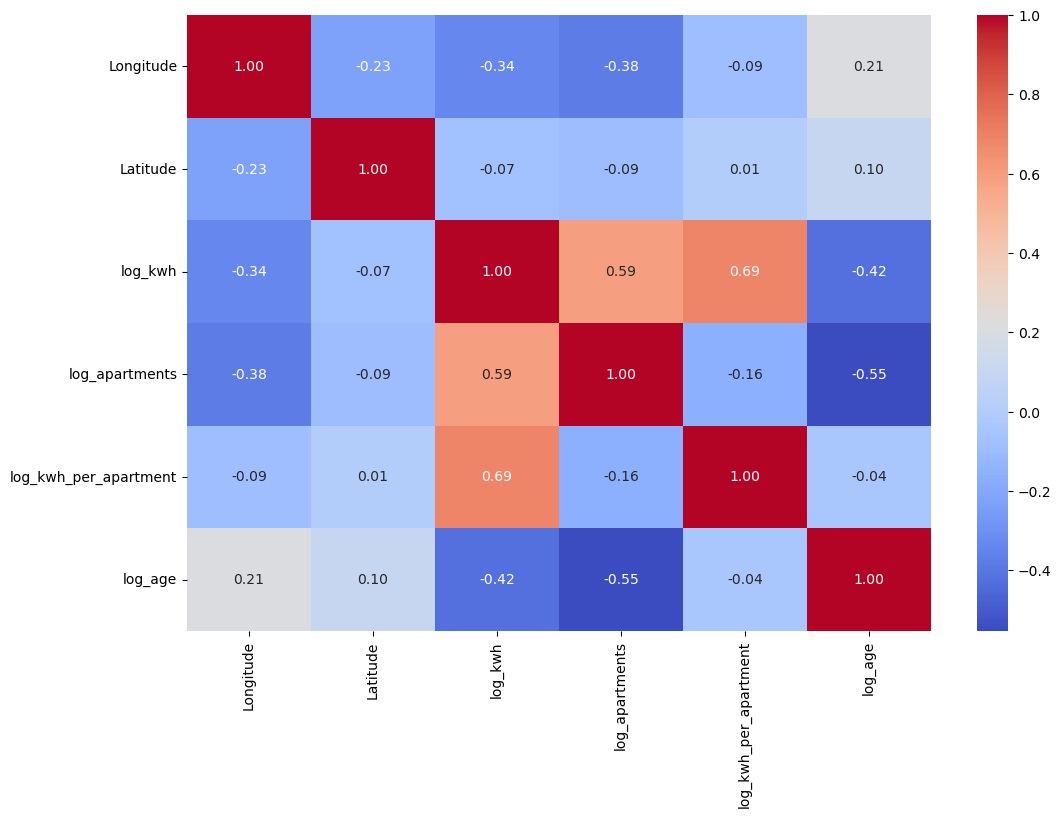

In [49]:
# Recalculate the correlation matrix after dropping the feature
new_corr_matrix = df.corr()

# Visualize the updated correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(new_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [50]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[['log_kwh', 'log_apartments','log_kwh_per_apartment',  'log_age','Longitude','Latitude']] = scaler.fit_transform(df[['log_kwh', 'log_apartments', 'log_kwh_per_apartment', 'log_age','Longitude','Latitude']])
print(df.describe())


          Longitude      Latitude       log_kwh  log_apartments  \
count  1.761000e+03  1.761000e+03  1.761000e+03     1761.000000   
mean  -1.413823e-13 -2.058597e-13 -2.420929e-17        0.000000   
std    1.000284e+00  1.000284e+00  1.000284e+00        1.000284   
min   -2.560027e+00 -3.291703e+00 -2.652791e+00       -1.870766   
25%   -3.121254e-01 -4.789294e-01 -7.340460e-01       -0.619685   
50%    4.422207e-01  5.820415e-02  1.331007e-02       -0.001301   
75%    7.191603e-01  7.578125e-01  7.441065e-01        0.816927   
max    1.061390e+00  2.005442e+00  2.826684e+00        3.552369   

       log_kwh_per_apartment       log_age  
count           1.761000e+03  1.761000e+03  
mean           -2.501627e-16  7.424183e-16  
std             1.000284e+00  1.000284e+00  
min            -2.288787e+00 -5.580443e+00  
25%            -5.746158e-01 -2.712404e-01  
50%            -1.081086e-01  1.554361e-01  
75%             3.945912e-01  7.220403e-01  
max             6.168035e+00  5.5699

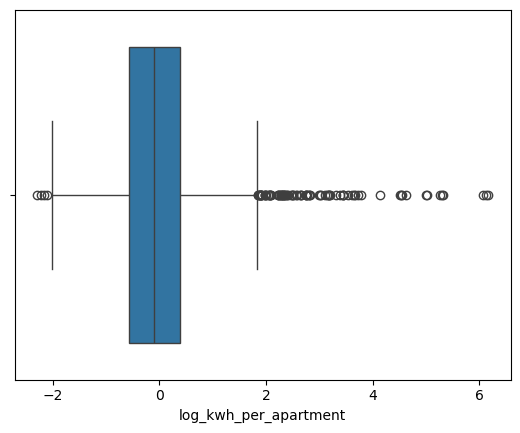

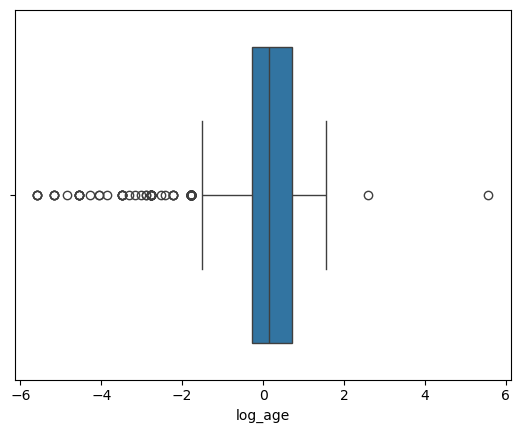

In [51]:
# Visualize outliers in boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['log_kwh_per_apartment'])
plt.show()

sns.boxplot(x=df['log_age'])
plt.show()


In [52]:
corr_matrix = df.corr()
corr_matrix

,Longitude,Latitude,log_kwh,log_apartments,log_kwh_per_apartment,log_age
Longitude,1.000000,-0.230486,-0.340414,-0.381119,-0.086185,0.210782
Latitude,-0.230486,1.000000,-0.070860,-0.092938,0.005442,0.100959
log_kwh,-0.340414,-0.070860,1.000000,0.591883,0.685964,-0.423688
log_apartments,-0.381119,-0.092938,0.591883,1.000000,-0.161764,-0.553201
log_kwh_per_apartment,-0.086185,0.005442,0.685964,-0.161764,1.000000,-0.036563
log_age,0.210782,0.100959,-0.423688,-0.553201,-0.036563,1.000000


In [53]:
df.to_csv('../data/processed/processed_data.csv', index=False)


In [54]:
skewness = data_loader.check_skewness()


Skewness for each numerical feature:
 Longitude               -1.224980
Latitude                -0.635503
log_kwh                 -0.018480
log_apartments          -0.017368
log_kwh_per_apartment    1.624804
log_age                 -1.795353
dtype: float64


In [55]:
import numpy as np
print("Means:", np.mean(df, axis=0))
print("Stds :", np.std(df, axis=0))


Means: Longitude               -1.413823e-13
Latitude                -2.058597e-13
log_kwh                 -2.420929e-17
log_apartments           0.000000e+00
log_kwh_per_apartment   -2.501627e-16
log_age                  7.424183e-16
dtype: float64
Stds : Longitude                1.0
Latitude                 1.0
log_kwh                  1.0
log_apartments           1.0
log_kwh_per_apartment    1.0
log_age                  1.0
dtype: float64
